In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('Data_Train.csv')

In [3]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
df['Date_of_Journey'].str.split('/').str[0]

0        24
1         1
2         9
3        12
4        01
         ..
10678     9
10679    27
10680    27
10681    01
10682     9
Name: Date_of_Journey, Length: 10683, dtype: object

In [6]:
df['Date']=df['Date_of_Journey'].str.split('/').str[0]
df['Month']=df['Date_of_Journey'].str.split('/').str[1]
df['Year']=df['Date_of_Journey'].str.split('/').str[2]

In [7]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [8]:
df['Date']=df['Date'].astype(int)
df['Month']=df['Month'].astype(int)
df['Year']=df['Year'].astype(int)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Date             10683 non-null  int32 
 12  Month            10683 non-null  int32 
 13  Year             10683 non-null  int32 
dtypes: int32(3), int64(1), object(10)
memory usage: 1.0+ MB


In [10]:
 df.drop('Date_of_Journey',axis=1,inplace=True)

In [11]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,2019
10679,Air India,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019
10680,Jet Airways,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019
10681,Vistara,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,2019


In [12]:
df['Arrival_Time']=df['Arrival_Time'].str.split(' ').str[0]

In [13]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,2019
10679,Air India,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019
10680,Jet Airways,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019
10681,Vistara,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,2019


In [14]:
df['Arrival_hour']=df['Arrival_Time'].str.split(':').str[0]
df['Arrival_min']=df['Arrival_Time'].str.split(':').str[1]

In [15]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019,01,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25,19h,2 stops,No info,13882,9,6,2019,04,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,2019,22,25
10679,Air India,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019,23,20
10680,Jet Airways,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019,11,20
10681,Vistara,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,2019,14,10


In [16]:
df['Arrival_hour']=df['Arrival_hour'].astype(int)
df['Arrival_min']=df['Arrival_min'].astype(int)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Date             10683 non-null  int32 
 11  Month            10683 non-null  int32 
 12  Year             10683 non-null  int32 
 13  Arrival_hour     10683 non-null  int32 
 14  Arrival_min      10683 non-null  int32 
dtypes: int32(5), int64(1), object(9)
memory usage: 1.0+ MB


In [18]:
df.drop('Arrival_Time',axis=1,inplace=True)

In [19]:
df['Dep_hour']=df['Dep_Time'].str.split(':').str[0]
df['Dep_min']=df['Dep_Time'].str.split(':').str[1]
df['Dep_hour']=df['Dep_hour'].astype(int)
df['Dep_min']=df['Dep_min'].astype(int)

In [20]:
df.drop('Dep_Time',axis=1,inplace=True)

In [21]:
df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2 stops,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU ? BLR,2h 30m,non-stop,No info,4107,9,4,2019,22,25,19,55
10679,Air India,Kolkata,Banglore,CCU ? BLR,2h 35m,non-stop,No info,4145,27,4,2019,23,20,20,45
10680,Jet Airways,Banglore,Delhi,BLR ? DEL,3h,non-stop,No info,7229,27,4,2019,11,20,8,20
10681,Vistara,Banglore,New Delhi,BLR ? DEL,2h 40m,non-stop,No info,12648,1,3,2019,14,10,11,30


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Duration         10683 non-null  object
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10683 non-null  object
 7   Price            10683 non-null  int64 
 8   Date             10683 non-null  int32 
 9   Month            10683 non-null  int32 
 10  Year             10683 non-null  int32 
 11  Arrival_hour     10683 non-null  int32 
 12  Arrival_min      10683 non-null  int32 
 13  Dep_hour         10683 non-null  int32 
 14  Dep_min          10683 non-null  int32 
dtypes: int32(7), int64(1), object(7)
memory usage: 959.9+ KB


In [23]:
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})

In [24]:
df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,0.0,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2.0,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2.0,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1.0,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1.0,No info,13302,1,3,2019,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU ? BLR,2h 30m,0.0,No info,4107,9,4,2019,22,25,19,55
10679,Air India,Kolkata,Banglore,CCU ? BLR,2h 35m,0.0,No info,4145,27,4,2019,23,20,20,45
10680,Jet Airways,Banglore,Delhi,BLR ? DEL,3h,0.0,No info,7229,27,4,2019,11,20,8,20
10681,Vistara,Banglore,New Delhi,BLR ? DEL,2h 40m,0.0,No info,12648,1,3,2019,14,10,11,30


In [25]:
df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
9039,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480,6,5,2019,9,25,9,45


In [26]:
df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
9039,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480,6,5,2019,9,25,9,45


In [27]:
df.drop(9039,axis=0,inplace=True)

In [28]:
df['Total_Stops'].unique()

array([0., 2., 1., 3., 4.])

In [29]:
df.drop('Route',axis=1,inplace=True)

In [30]:
df["Additional_Info"].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [31]:
df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302,1,3,2019,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,2h 30m,0.0,No info,4107,9,4,2019,22,25,19,55
10679,Air India,Kolkata,Banglore,2h 35m,0.0,No info,4145,27,4,2019,23,20,20,45
10680,Jet Airways,Banglore,Delhi,3h,0.0,No info,7229,27,4,2019,11,20,8,20
10681,Vistara,Banglore,New Delhi,2h 40m,0.0,No info,12648,1,3,2019,14,10,11,30


In [32]:
df['Duration']=df['Duration'].str.split(' ').str[0].str.split('h').str[0]

In [33]:
df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,2,0.0,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7,2.0,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,19,2.0,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,5,1.0,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,4,1.0,No info,13302,1,3,2019,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,2,0.0,No info,4107,9,4,2019,22,25,19,55
10679,Air India,Kolkata,Banglore,2,0.0,No info,4145,27,4,2019,23,20,20,45
10680,Jet Airways,Banglore,Delhi,3,0.0,No info,7229,27,4,2019,11,20,8,20
10681,Vistara,Banglore,New Delhi,2,0.0,No info,12648,1,3,2019,14,10,11,30


In [34]:
df[df['Duration']=='5m']

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
6474,Air India,Mumbai,Hyderabad,5m,2.0,No info,17327,6,3,2019,16,55,16,50


In [35]:
df.drop(6474,axis=0,inplace=True)

In [36]:
df['Duration']=df['Duration'].astype(int)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10681 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10681 non-null  object 
 1   Source           10681 non-null  object 
 2   Destination      10681 non-null  object 
 3   Duration         10681 non-null  int32  
 4   Total_Stops      10681 non-null  float64
 5   Additional_Info  10681 non-null  object 
 6   Price            10681 non-null  int64  
 7   Date             10681 non-null  int32  
 8   Month            10681 non-null  int32  
 9   Year             10681 non-null  int32  
 10  Arrival_hour     10681 non-null  int32  
 11  Arrival_min      10681 non-null  int32  
 12  Dep_hour         10681 non-null  int32  
 13  Dep_min          10681 non-null  int32  
dtypes: float64(1), int32(8), int64(1), object(4)
memory usage: 917.9+ KB


In [38]:
 #df.drop('Duration',axis=1,inplace=True)

In [39]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [40]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [41]:
df['Airline']=labelencoder.fit_transform(df['Airline'])
df['Source']=labelencoder.fit_transform(df['Source'])
df['Additional_Info']=labelencoder.fit_transform(df['Additional_Info'])
df['Destination']=labelencoder.fit_transform(df['Destination']) 

In [42]:
df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,3,0,5,2,0.0,8,3897,24,3,2019,1,10,22,20
1,1,3,0,7,2.0,8,7662,1,5,2019,13,15,5,50
2,4,2,1,19,2.0,8,13882,9,6,2019,4,25,9,25
3,3,3,0,5,1.0,8,6218,12,5,2019,23,30,18,5
4,3,0,5,4,1.0,8,13302,1,3,2019,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,2,0.0,8,4107,9,4,2019,22,25,19,55
10679,1,3,0,2,0.0,8,4145,27,4,2019,23,20,20,45
10680,4,0,2,3,0.0,8,7229,27,4,2019,11,20,8,20
10681,10,0,5,2,0.0,8,12648,1,3,2019,14,10,11,30


In [43]:
#from sklearn.preprocessing import OneHotEncoder
#one=OneHotEncoder()
#df['Airline']=one.fit_transform(np.array(df['Airline']).reshape(-1,1))
#df['Source']=one.fit_transform(np.array(df['Source']).reshape(-1,1))
#df['Additional_Info']=one.fit_transform(np.array(df['Additional_Info']).reshape(-1,1))
#df['Destination']=one.fit_transform(np.array(df['Destination']).reshape(-1,1))

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10681 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10681 non-null  int32  
 1   Source           10681 non-null  int32  
 2   Destination      10681 non-null  int32  
 3   Duration         10681 non-null  int32  
 4   Total_Stops      10681 non-null  float64
 5   Additional_Info  10681 non-null  int32  
 6   Price            10681 non-null  int64  
 7   Date             10681 non-null  int32  
 8   Month            10681 non-null  int32  
 9   Year             10681 non-null  int32  
 10  Arrival_hour     10681 non-null  int32  
 11  Arrival_min      10681 non-null  int32  
 12  Dep_hour         10681 non-null  int32  
 13  Dep_min          10681 non-null  int32  
dtypes: float64(1), int32(12), int64(1)
memory usage: 751.0 KB


In [45]:
df1=pd.read_csv("E:\PYTHON\DATA SCIENCE PROJECT\FLIGHT PRICE PREDCTIONS\Test_set.csv")

In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [47]:
df1

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [48]:
df1['Date']=df1['Date_of_Journey'].str.split('/').str[0]
df1['Month']=df1['Date_of_Journey'].str.split('/').str[1]
df1['Year']=df1['Date_of_Journey'].str.split('/').str[2]

print(df1)

#convert date to int

df1['Date']=df1['Date'].astype(int)
df1['Month']=df1['Month'].astype(int)
df1['Year']=df1['Year'].astype(int)

# drop existing date

df1.drop('Date_of_Journey',axis=1,inplace=True)

#spliting arriavl time
    
df1['Arrival_Time']=df1['Arrival_Time'].str.split(' ').str[0]


#spliting time and mins


df1['Arrival_hour']=df1['Arrival_Time'].str.split(':').str[0]
df1['Arrival_min']=df1['Arrival_Time'].str.split(':').str[1]

#coverting type to int

df1['Arrival_hour']=df1['Arrival_hour'].astype(int)
df1['Arrival_min']=df1['Arrival_min'].astype(int)


# droping arrival time

df1.drop('Arrival_Time',axis=1,inplace=True)

print(df1)

df1['Dep_hour']=df1['Dep_Time'].str.split(':').str[0]
df1['Dep_min']=df1['Dep_Time'].str.split(':').str[1]
df1['Dep_hour']=df1['Dep_hour'].astype(int)
df1['Dep_min']=df1['Dep_min'].astype(int)

#drop column

df1.drop('Dep_Time',axis=1,inplace=True)

#encoding column

df1['Total_Stops']=df1['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,'nan':1})

#droping column

df1.drop('Route',axis=1,inplace=True)

#spliting duration

df1['Duration']=df1['Duration'].str.split(' ').str[0].str.split('h').str[0]

# unique values

df1['Duration'].unique()

# identify error

df1[df1['Duration']=='5m']

#droping error creating column

df1.drop(2660,axis=0,inplace=True)

# droping old duration column

#df1.drop('Duration',axis=1,inplace=True)

# converting to int type

df1['Duration'].astype(int)

# labeling other columns
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()


df1['Airline']=labelencoder.fit_transform(df1['Airline'])
df1['Source']=labelencoder.fit_transform(df1['Source'])
df1['Additional_Info']=labelencoder.fit_transform(df1['Additional_Info'])
df1['Destination']=labelencoder.fit_transform(df1['Destination'])

print(df1)

                Airline Date_of_Journey    Source Destination  \
0           Jet Airways       6/06/2019     Delhi      Cochin   
1                IndiGo      12/05/2019   Kolkata    Banglore   
2           Jet Airways      21/05/2019     Delhi      Cochin   
3     Multiple carriers      21/05/2019     Delhi      Cochin   
4              Air Asia      24/06/2019  Banglore       Delhi   
...                 ...             ...       ...         ...   
2666          Air India       6/06/2019   Kolkata    Banglore   
2667             IndiGo      27/03/2019   Kolkata    Banglore   
2668        Jet Airways       6/03/2019     Delhi      Cochin   
2669          Air India       6/03/2019     Delhi      Cochin   
2670  Multiple carriers      15/06/2019     Delhi      Cochin   

                Route Dep_Time  Arrival_Time Duration Total_Stops  \
0     DEL → BOM → COK    17:30  04:25 07 Jun  10h 55m      1 stop   
1     CCU → MAA → BLR    06:20         10:20       4h      1 stop   
2     DEL → 

In [49]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2670 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2670 non-null   int32 
 1   Source           2670 non-null   int32 
 2   Destination      2670 non-null   int32 
 3   Duration         2670 non-null   object
 4   Total_Stops      2670 non-null   int64 
 5   Additional_Info  2670 non-null   int32 
 6   Date             2670 non-null   int32 
 7   Month            2670 non-null   int32 
 8   Year             2670 non-null   int32 
 9   Arrival_hour     2670 non-null   int32 
 10  Arrival_min      2670 non-null   int32 
 11  Dep_hour         2670 non-null   int32 
 12  Dep_min          2670 non-null   int32 
dtypes: int32(11), int64(1), object(1)
memory usage: 177.3+ KB


In [50]:
df1

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,4,2,1,10,1,5,6,6,2019,4,25,17,30
1,3,3,0,4,1,5,12,5,2019,10,20,6,20
2,4,2,1,23,1,3,21,5,2019,19,0,19,15
3,6,2,1,13,1,5,21,5,2019,21,0,8,0
4,0,0,2,2,0,5,24,6,2019,2,45,23,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,23,1,5,6,6,2019,20,25,20,30
2667,3,3,0,2,0,5,27,3,2019,16,55,14,20
2668,4,2,1,6,1,5,6,3,2019,4,25,21,50
2669,1,2,1,15,1,5,6,3,2019,19,15,4,0


# featuring data


In [51]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Date', 'Month', 'Year', 'Arrival_hour',
       'Arrival_min', 'Dep_hour', 'Dep_min'],
      dtype='object')

In [52]:
x=df.loc[:,['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops','Additional_Info', 'Date', 'Month', 'Year', 'Arrival_hour','Arrival_min', 'Dep_hour', 'Dep_min']]

In [53]:
df['Total_Stops'].unique()

array([0., 2., 1., 3., 4.])

In [54]:
x

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,3,0,5,2,0.0,8,24,3,2019,1,10,22,20
1,1,3,0,7,2.0,8,1,5,2019,13,15,5,50
2,4,2,1,19,2.0,8,9,6,2019,4,25,9,25
3,3,3,0,5,1.0,8,12,5,2019,23,30,18,5
4,3,0,5,4,1.0,8,1,3,2019,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,2,0.0,8,9,4,2019,22,25,19,55
10679,1,3,0,2,0.0,8,27,4,2019,23,20,20,45
10680,4,0,2,3,0.0,8,27,4,2019,11,20,8,20
10681,10,0,5,2,0.0,8,1,3,2019,14,10,11,30


In [55]:
y=df.iloc[:,6]

In [56]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10681, dtype: int64

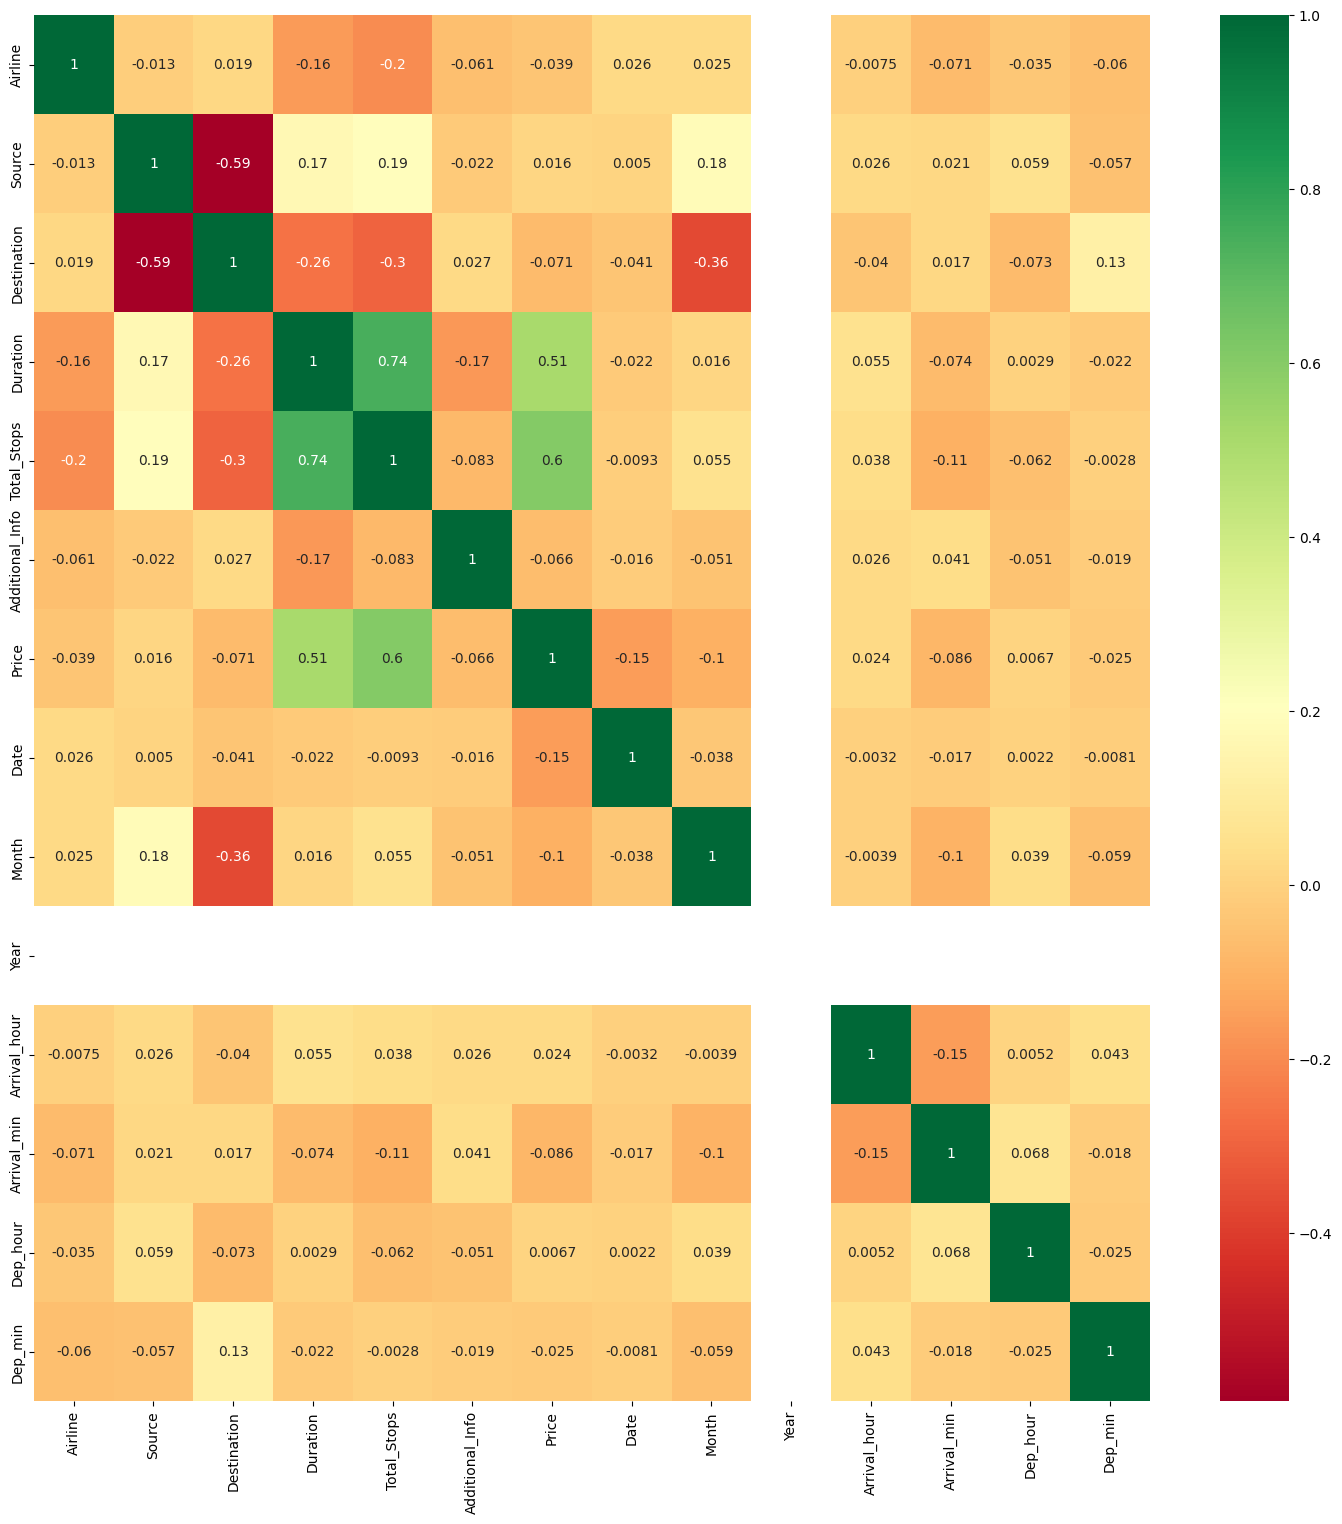

In [57]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")
plt.show()

In [58]:
from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(x,y)

ExtraTreesRegressor()

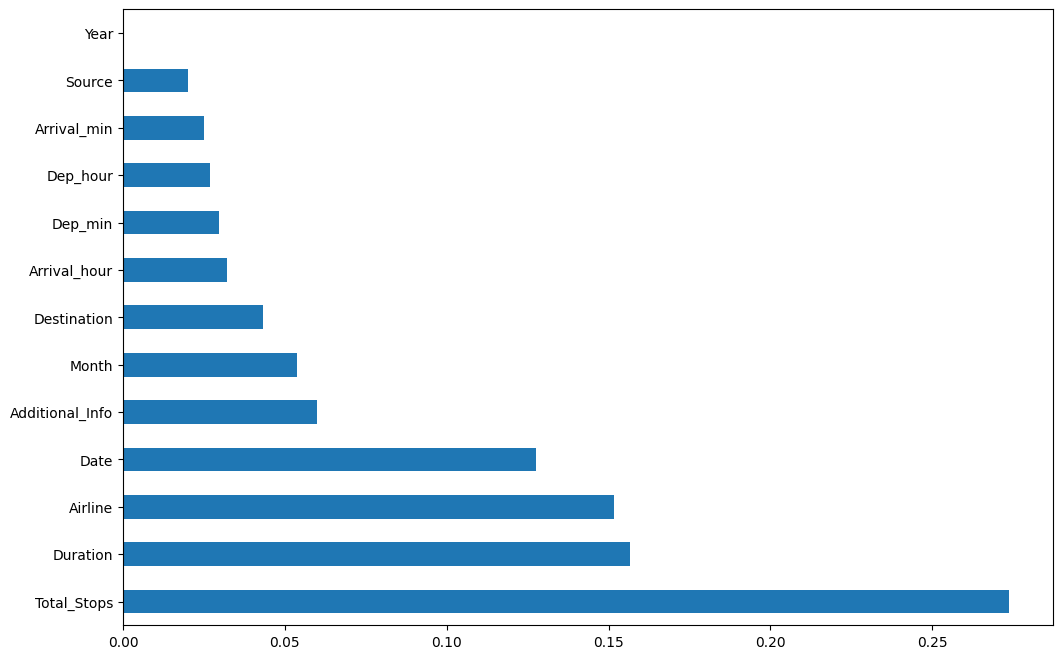

In [59]:
plt.figure(figsize=(12,8))
feat_importances=pd.Series(selection.feature_importances_,index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [60]:
x1=df1.loc[:,['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops','Additional_Info', 'Date', 'Month', 'Year', 'Arrival_hour','Arrival_min', 'Dep_hour', 'Dep_min']]

In [61]:
df1['Price']=''

In [62]:
y1=df['Price']

In [63]:
y_predd=selection.predict(x1)

In [64]:
y_predd

array([10262.  ,  4914.16, 17260.98, ..., 13843.  , 14050.26,  7502.93])

In [65]:
df1['Price']=y_predd

In [66]:
df1

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Price
0,4,2,1,10,1,5,6,6,2019,4,25,17,30,10262.00
1,3,3,0,4,1,5,12,5,2019,10,20,6,20,4914.16
2,4,2,1,23,1,3,21,5,2019,19,0,19,15,17260.98
3,6,2,1,13,1,5,21,5,2019,21,0,8,0,9622.59
4,0,0,2,2,0,5,24,6,2019,2,45,23,55,4018.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,23,1,5,6,6,2019,20,25,20,30,10529.82
2667,3,3,0,2,0,5,27,3,2019,16,55,14,20,4671.83
2668,4,2,1,6,1,5,6,3,2019,4,25,21,50,13843.00
2669,1,2,1,15,1,5,6,3,2019,19,15,4,0,14050.26


In [71]:
x

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,3,0,5,2,0.0,8,24,3,2019,1,10,22,20
1,1,3,0,7,2.0,8,1,5,2019,13,15,5,50
2,4,2,1,19,2.0,8,9,6,2019,4,25,9,25
3,3,3,0,5,1.0,8,12,5,2019,23,30,18,5
4,3,0,5,4,1.0,8,1,3,2019,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,2,0.0,8,9,4,2019,22,25,19,55
10679,1,3,0,2,0.0,8,27,4,2019,23,20,20,45
10680,4,0,2,3,0.0,8,27,4,2019,11,20,8,20
10681,10,0,5,2,0.0,8,1,3,2019,14,10,11,30


In [72]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10681, dtype: int64

In [74]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [77]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
ref=reg_rf.fit(x_train,y_train)

In [78]:
y_pred5=ref.predict(x_test)

In [79]:
ref.score(x_test,y_test)

0.8775637963582984

In [69]:
y_pred = reg_rf.predict(x)

C:\Users\User\AppData\Local\Temp\ipykernel_18972\3506619818.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred5)


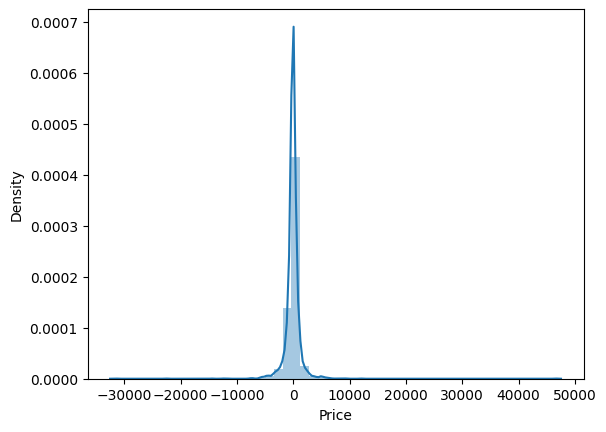

In [81]:
sns.distplot(y_test-y_pred5)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x,y)

In [ ]:
df1['Price']=lr.predict(x1)

In [ ]:
df1

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
# RMSE/(max(DV)-min(DV))

2090.5509/(max(y)-min(y))

In [ ]:
metrics.r2_score(y_test, y_pred)

# hyperparameter tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
 #Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}


In [ ]:
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [ ]:
rf_random.fit(X_train,y_train)

In [ ]:
rf_random.best_params_

In [ ]:
{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [ ]:

prediction = rf_random.predict(X_test)

In [ ]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

In [ ]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()


In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))